# 기상청 날씨 정보 시각화하기
- [기상청](https://www.weather.go.kr/w/weather/forecast/short-term.do)에서 온도 불러오기
- 불러온 데이터를 시각화하기


In [1]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

## 온도 정보 불러오기

In [23]:
with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver:
    driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")
    driver.implicitly_wait(10)
    chart = driver.find_element(By.CLASS_NAME, "tchart")
    tlist = chart.text.split("\n")
    tlist = [int(t.strip("℃")) for t in tlist]
    print(tlist)

[17, 17, 16, 14, 13, 12, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 12, 14]


## 온도 데이터 시각화하기

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

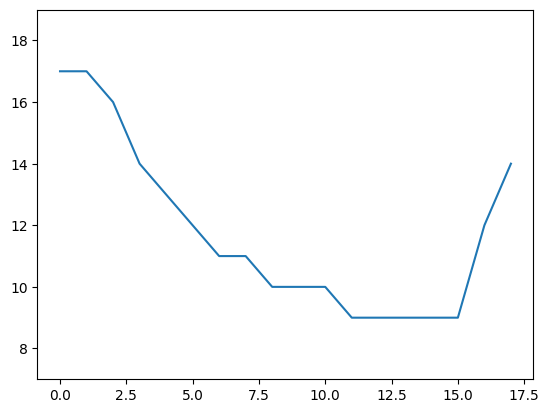

In [30]:
plt.ylim((min(tlist) - 2, max(tlist) + 2))
sns.lineplot(x=list(range(len(tlist))), y=tlist)